In [45]:
# import packages
from matplotlib import pyplot as plt
import numpy as np
import math
import pylab
import matplotlib
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Ornstein Uhlenbeck
Simulate the Ornstein Uhlenbeck process using the class defined in `ornstein_uhlenbeck.py`.

In [70]:
from utils.ornstein_uhlenbeck import OrnsteinUhlenbeck

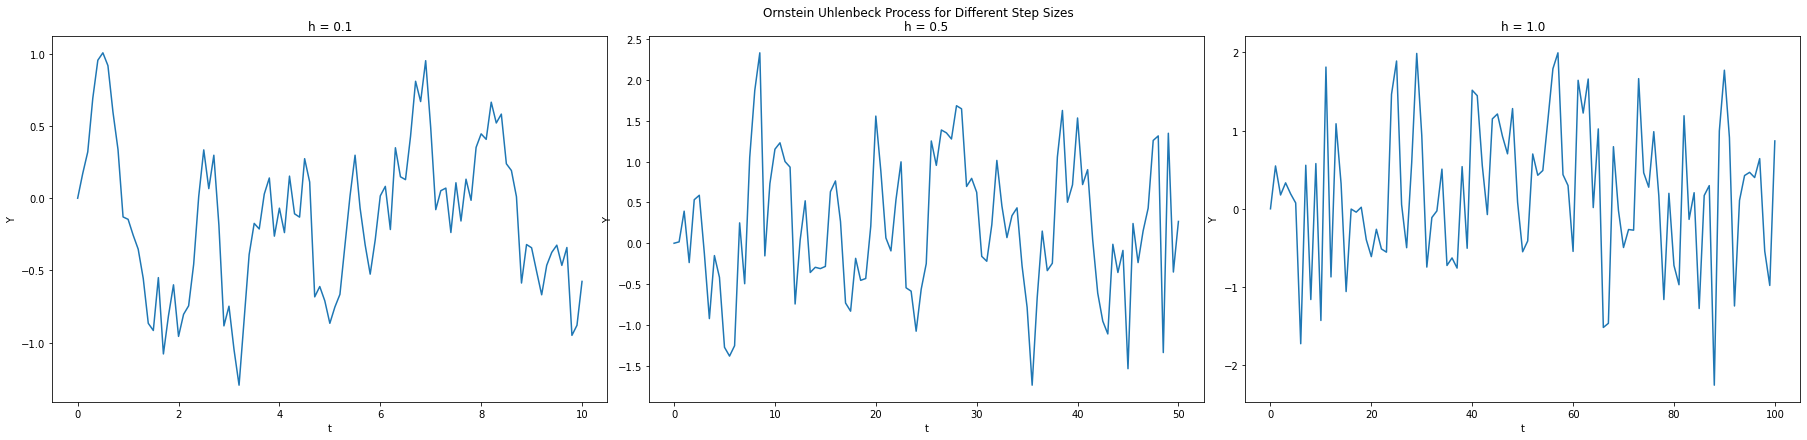

In [71]:
a = 1.0
step_sizes = [0.1, 0.5, 1.0]
steps = 100
init_value = 0.0

fig, ax = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Ornstein Uhlenbeck Process for Different Step Sizes")
fig.tight_layout()
for i, h in enumerate(step_sizes):
    proc = OrnsteinUhlenbeck(init_value=init_value, h=h, a=a)
    proc.simulate(steps)
    ax[i].set_xlabel('t')
    ax[i].set_ylabel('Y')
    ax[i].set_title(f"h = {h}")
    ax[i].plot(np.linspace(0.0, h * steps, num=steps+1), proc.vals)

plt.show()

# Feller Diffusion
Stop simulation at extinction time, or the first time the value is less than or equal to $0$.

In [3]:
from utils.feller import Feller

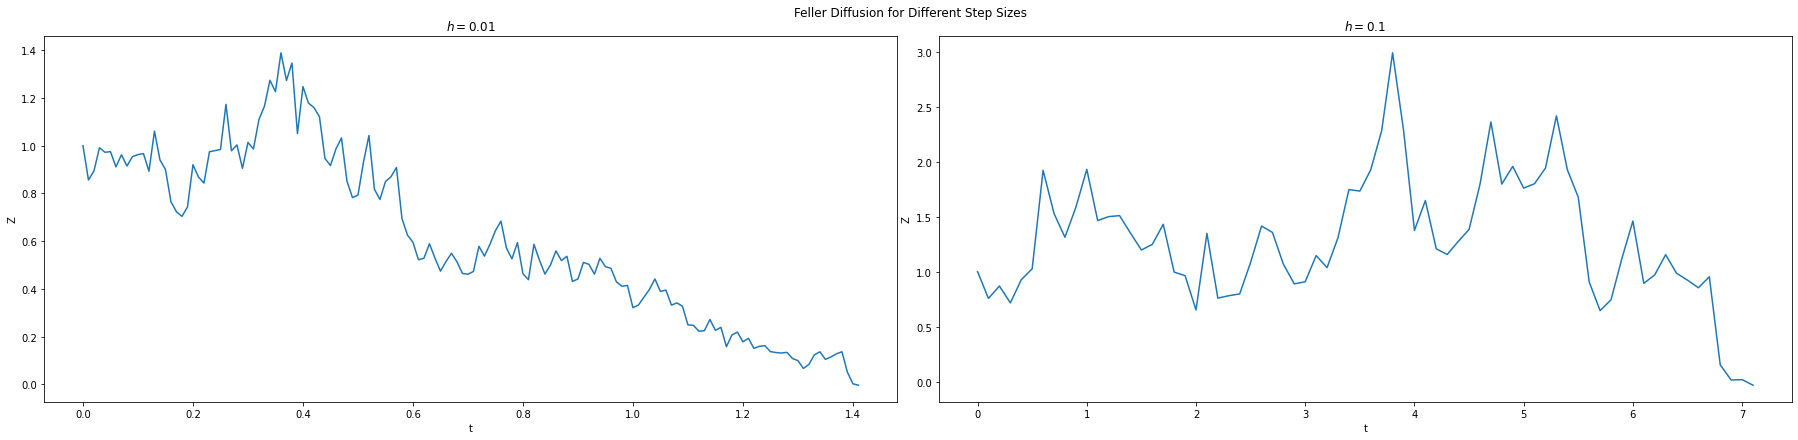

In [8]:
step_sizes = [0.01, 0.1]
#steps = 100
init_value = 1.0

fig, ax = plt.subplots(1, len(step_sizes), figsize=(25, 6))
fig.suptitle("Feller Diffusion for Different Step Sizes")
fig.tight_layout()
for i, h in enumerate(step_sizes):
    proc = Feller(init_value=init_value, h=h)
    #proc.simulate(steps)
    steps = proc.extinct_simulate()
    ax[i].set_xlabel('t')
    ax[i].set_ylabel('Z')
    ax[i].set_title(f"$h = {h}$")
    ax[i].plot(np.linspace(0.0, h * steps, num=steps+1), proc.vals)

plt.show()

## Monte Carlo of Expectation
We can use Monte Carlo simulation to compute the expected value of $T$.

([<matplotlib.axis.XTick at 0x7f0ded385160>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

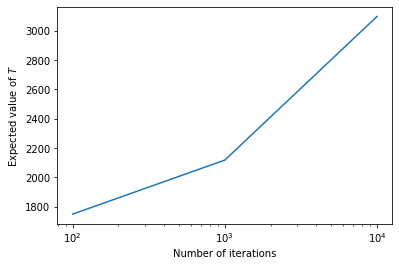

In [9]:
init_value = 1.0
num_iters = [1e2, 1e3, 1e4]
h = 0.01
evs = []
for iters in num_iters:
    proc = Feller(init_value=init_value, h=h)
    sum = 0.0
    for _ in range(int(iters)):
        sum += proc.extinct_simulate()
    expected = sum / iters
    evs.append(expected)

plt.figure()
plt.plot(num_iters, evs)
plt.xscale('log')
plt.ylabel("Expected value of $T$")
plt.xlabel("Number of iterations")
plt.xticks(num_iters)


# Another Matrix Completion Problem
Residual matrix completion problem and simulating an SDE based off of the residual using the class defined in `matrix_completion.py`.

In [3]:
from utils.matrix_completion import MatrixCompletion

Debugging Block

In [75]:
#print(get_Pbeta(float('inf'), np.array([1, 2, 3])))
proc = MatrixCompletion(init_value=np.zeros(5), h=0.01, beta=float('inf'))
#proc.
print(proc.get_noise(np.array([1, 1, 1, 1, 1])))
proc.step()
print(proc.vals)
proc.step()
print(proc.vals)

[-0.08380971 -0.08380971 -0.08380971 -0.08380971 -0.08380971]
[array([0., 0., 0., 0., 0.]), array([-0.0509843, -0.0509843, -0.0509843, -0.0509843, -0.0509843])]
[array([0., 0., 0., 0., 0.]), array([-0.0509843, -0.0509843, -0.0509843, -0.0509843, -0.0509843]), array([-0.09250496, -0.09250496, -0.09250496, -0.09250496, -0.09250496])]


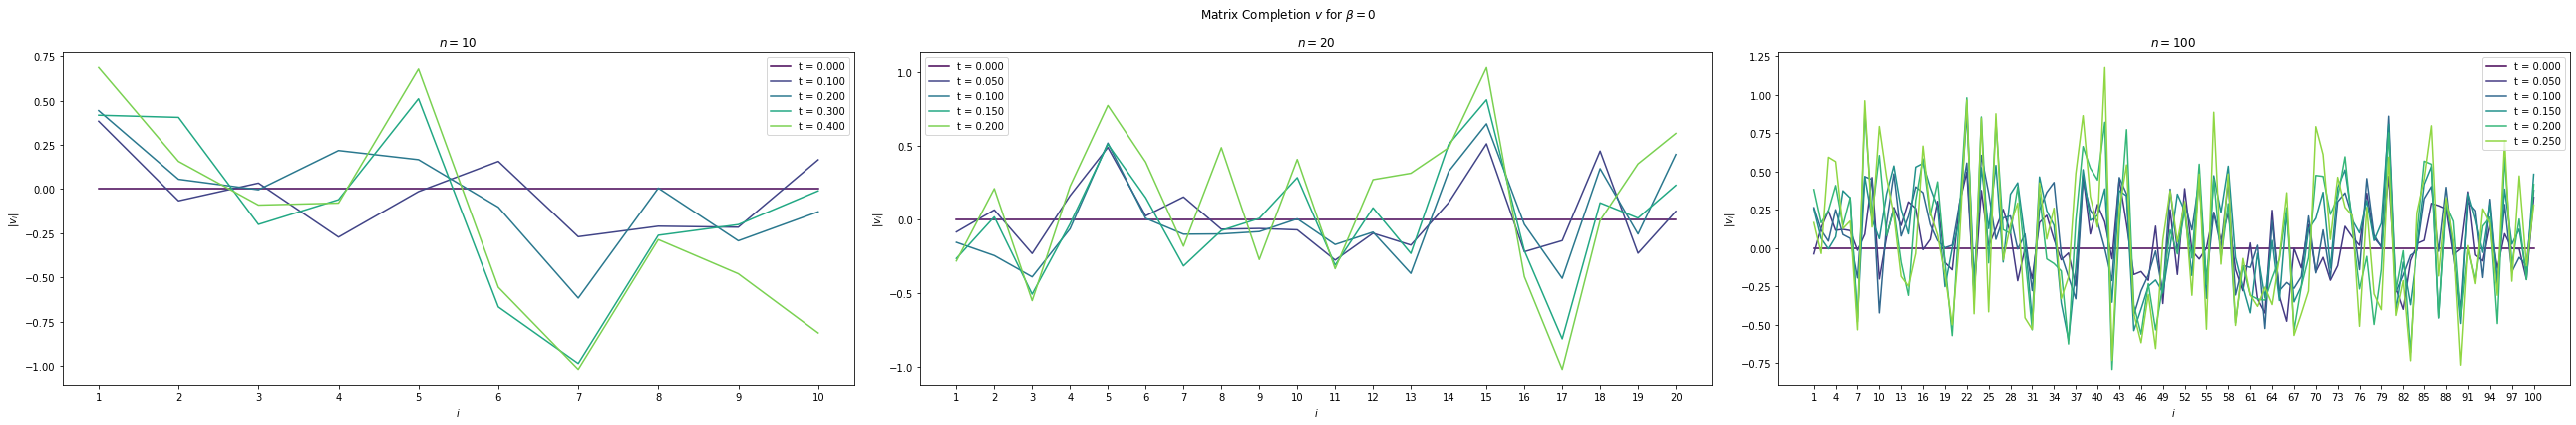

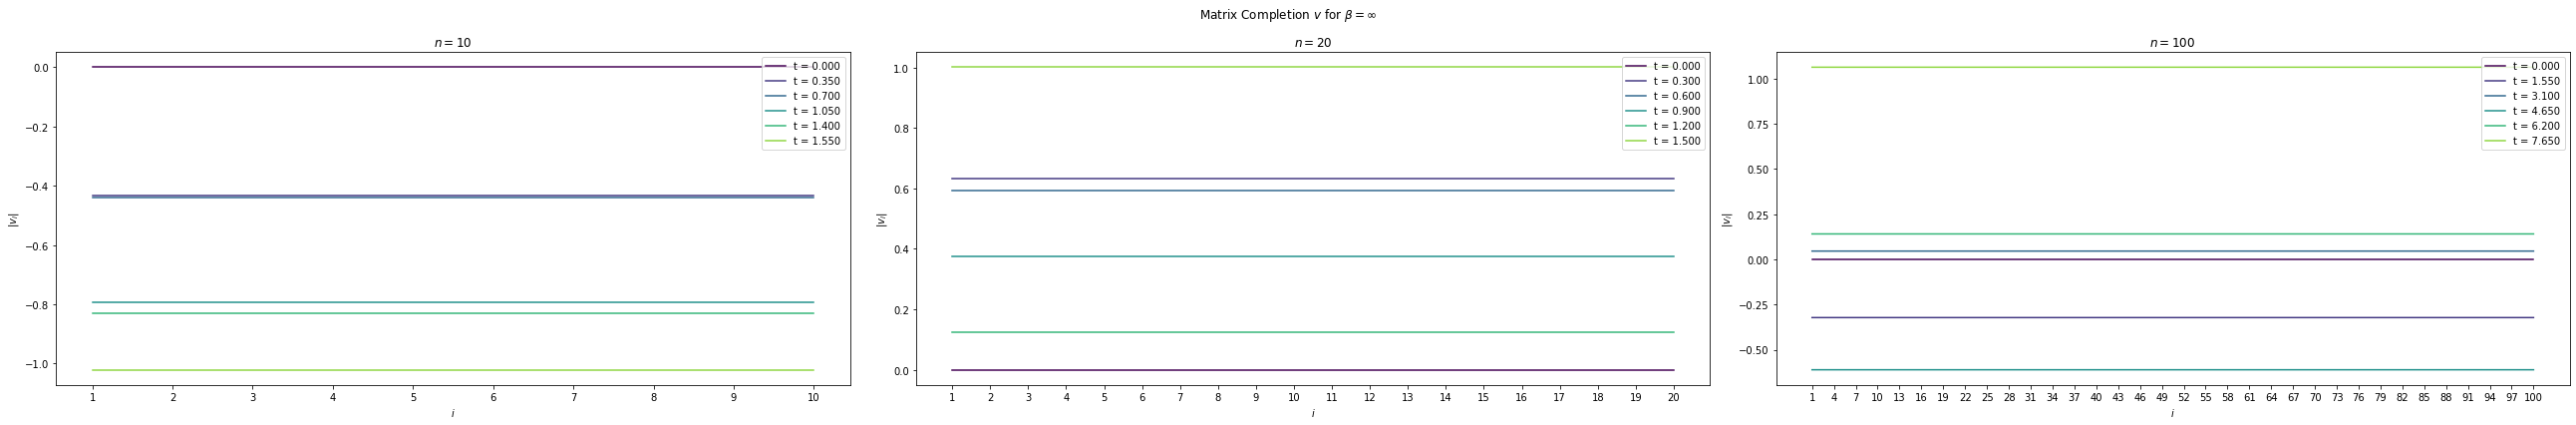

In [76]:
step_size = 0.05
num_plotted = 5
dims = [10, 20, 100]
betas = [0, float('inf')]
init_values = [np.zeros(dim) for dim in dims]
cmap = pylab.get_cmap('viridis')

for beta in betas:
    fig, ax = plt.subplots(1, len(init_values), figsize=(36, 6))
    formatted_beta = ('0' if beta == 0 else '\infty')
    fig.suptitle(f"Matrix Completion $v$ for $\\beta = {formatted_beta}$")
    for i, init_value in enumerate(init_values):
        proc = MatrixCompletion(init_value=init_value, h=step_size, beta=beta)
        steps = proc.extinct_simulate()
        ax[i].set_xlabel('$i$')
        ax[i].set_ylabel('$|v_i|$')
        ax[i].set_title(f"$n = {proc.n}$")
        # plot all vals
        # ax[i].plot(np.linspace(0.0, step_size * steps, num=steps+1), proc.vals)
        # plot a subset of vals
        plot_step = math.ceil(float(steps) / num_plotted)
        cur = 0
        to_plot = []
        while cur < steps + 1:
            to_plot.append(cur)
            cur += plot_step

        if (to_plot[-1] != steps):
            to_plot += [steps]

        
        x = np.arange(1, proc.n + 1, 1)
        if proc.n <= 25:
            ax[i].set_xticks(x)
        else:
            ax[i].set_xticks(np.arange(1, proc.n + 1, 3))
        for color_index, index in enumerate(to_plot):
            color = cmap(1.*color_index/len(to_plot))
            color = matplotlib.colors.to_hex(color)
            ax[i].plot(x, proc.vals[index], label=f"t = {(step_size * index):.3f}", color=color)
        ax[i].legend()
    fig.tight_layout()
plt.show()


## Projections
Visualizing these are hard. Let's see if projecting down to two dimensions makes this easier to visualize and maybe provide interesting insight.

In [40]:
init_value = np.zeros(10)
h = 0.01
beta = 0
proc = MatrixCompletion(init_value=init_value, h=h, beta=beta)
steps = proc.extinct_simulate()

/home/alan/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


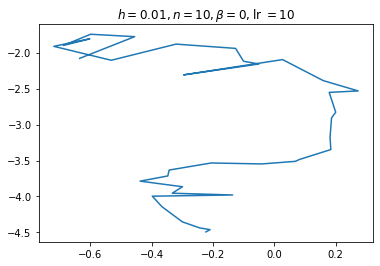

In [43]:
# tsne project
learning_rate = 10
vals = np.array(proc.vals)
projector = TSNE(n_components=2, learning_rate=learning_rate, init='pca')
vals_embedded = projector.fit_transform(vals)
# plot
x = []
y = []
# extract x, y
for embed in vals_embedded:
    x.append(embed[0])
    y.append(embed[1])
plt.figure()
plt.title(f"$h = {proc.h}, n = {proc.n}, \\beta = {proc.beta},$lr $= {learning_rate}$")
plt.plot(x, y)

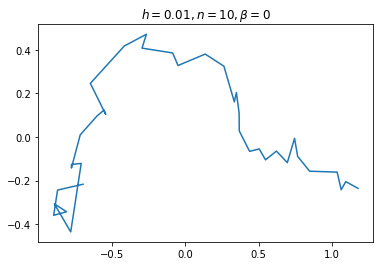

In [44]:
# pca project
vals = np.array(proc.vals)
projector = PCA(n_components=2)
vals_embedded = projector.fit_transform(vals)
# plot
x = []
y = []
# extract x, y
for embed in vals_embedded:
    x.append(embed[0])
    y.append(embed[1])
plt.figure()
plt.title(f"$h = {proc.h}, n = {proc.n}, \\beta = {proc.beta}$")
plt.plot(x, y)

# Filtered Matrix Process
In this section we use the `filtered_matrix_completion.py` file to simulate and plot various time steps of the Filtered Matrix Completion process.

In [19]:
from utils.filtered_matrix_completion import FilteredMatrixProcess

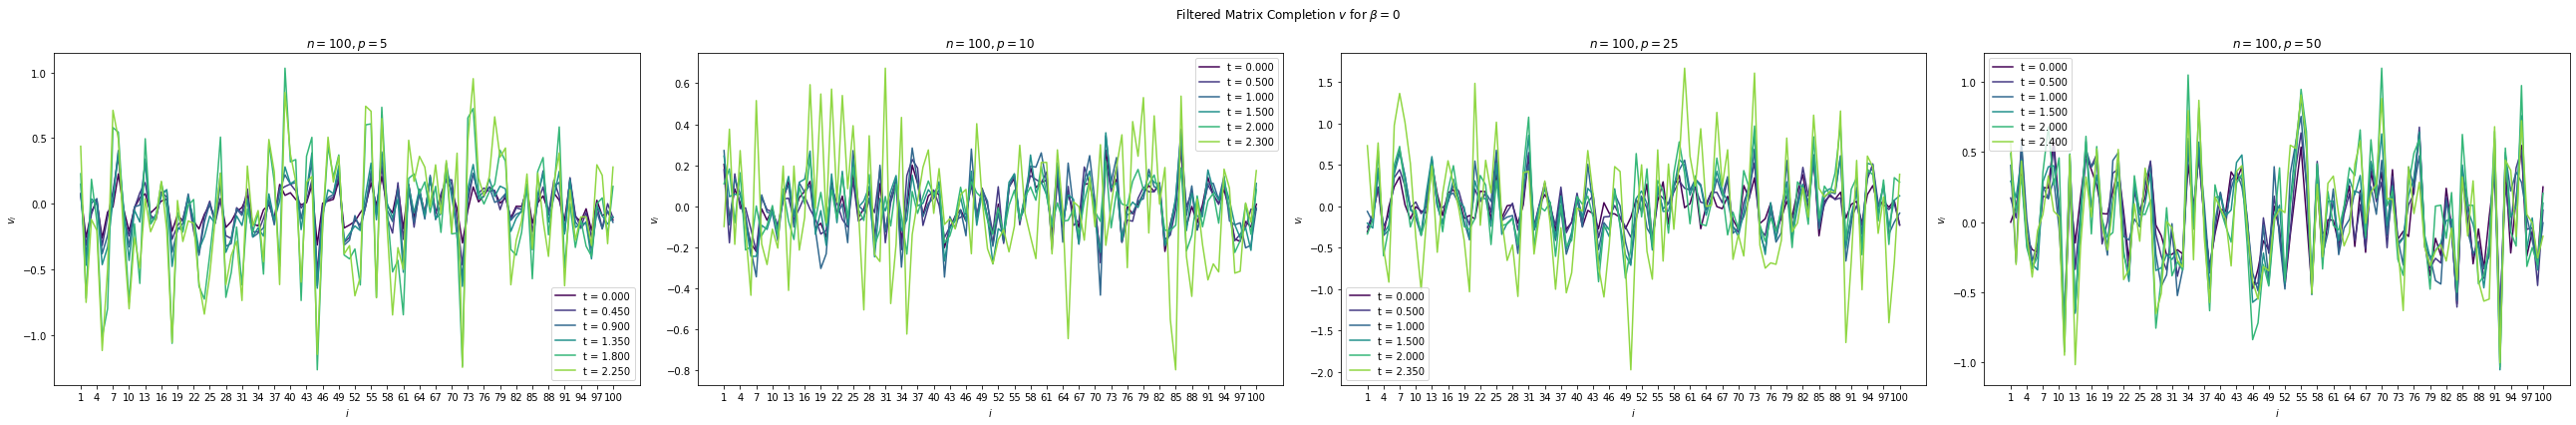

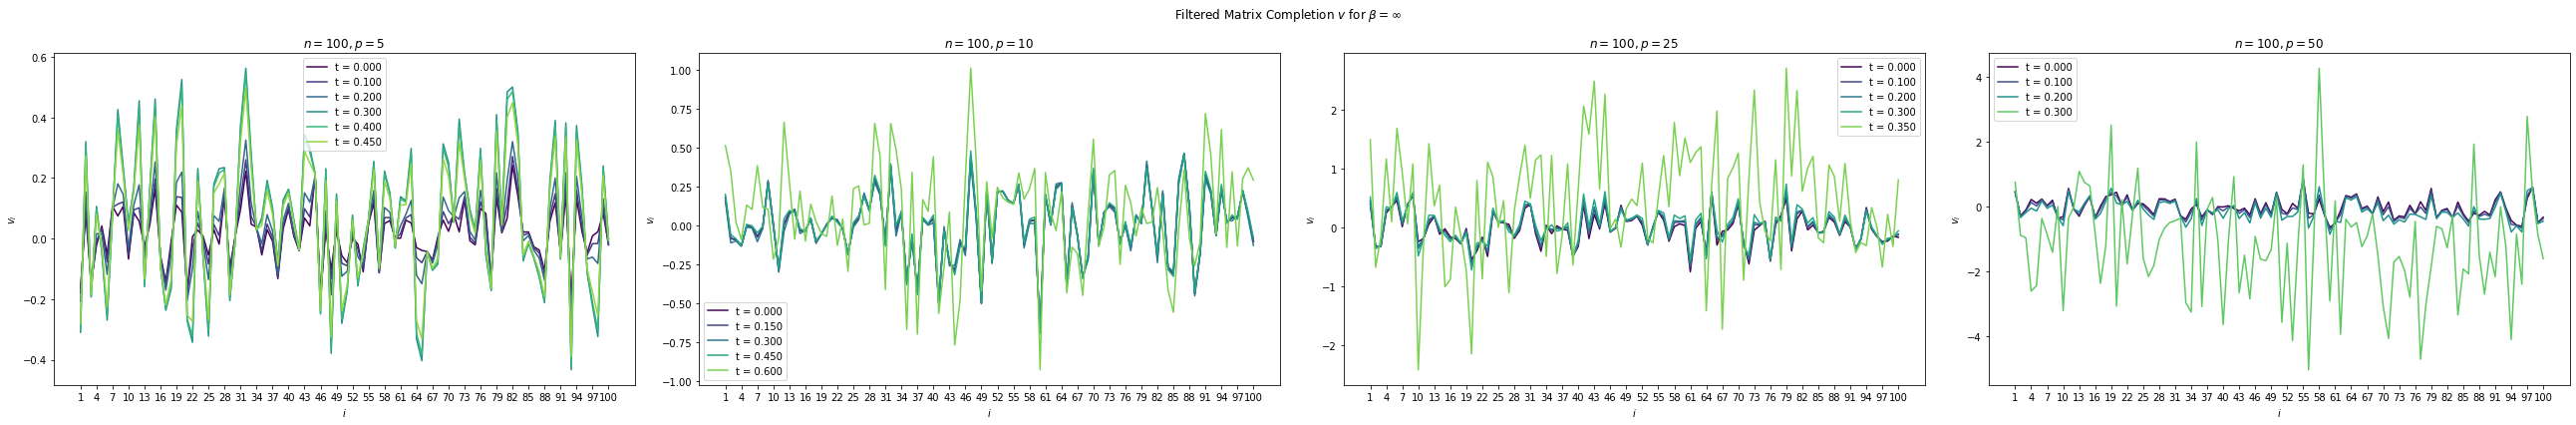

In [81]:
step_size = 0.05
n = 100
betas = [0, float('inf')]
ranks = [5, 10 ,25, 50]

for beta in betas:
    fig, ax = plt.subplots(1, len(ranks), figsize=(36, 6))
    formatted_beta = ('0' if beta == 0 else '\infty')
    fig.suptitle(f"Filtered Matrix Completion $v$ for $\\beta = {formatted_beta}$")
    for i, p in enumerate(ranks):
        proc = FilteredMatrixProcess(n=n, p=p, h=step_size, beta=beta)
        steps = proc.extinct_simulate()
        #ax[i].set_xlabel('$t$')
        ax[i].set_xlabel('$i$')
        ax[i].set_ylabel('$v_i$')
        ax[i].set_title(f"$n = {proc.n}, p = {proc.p}$")
        #ax[i].plot(np.linspace(0.0, step_size * steps, num=steps+1), proc.vals)
        plot_step = math.ceil(float(steps) / num_plotted)
        cur = 0
        to_plot = []
        while cur < steps + 1:
            to_plot.append(cur)
            cur += plot_step

        if (to_plot[-1] != steps):
            to_plot += [steps]

        
        x = np.arange(1, proc.n + 1, 1)
        if proc.n <= 25:
            ax[i].set_xticks(x)
        else:
            ax[i].set_xticks(np.arange(1, proc.n + 1, 3))
        for color_index, index in enumerate(to_plot):
            color = cmap(1.*color_index/len(to_plot))
            color = matplotlib.colors.to_hex(color)
            ax[i].plot(x, proc.vals[index], label=f"t = {(step_size * index):.3f}", color=color)
        ax[i].legend()
    fig.tight_layout()

plt.show()


## Projections
Again, let's try to project down to $2$ dimensions.

In [28]:
h = 0.05
beta = 0
n = 100
p = 10
proc = FilteredMatrixProcess(n=n, p=p, h=h, beta=beta)
steps = proc.extinct_simulate()

/home/alan/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


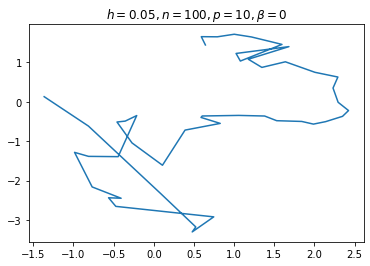

In [38]:
# tsne project
learning_rate = 10
vals = np.array(proc.vals)
projector = TSNE(n_components=2, learning_rate=learning_rate, init='pca')
vals_embedded = projector.fit_transform(vals)
# plot
x = []
y = []
# extract x, y
for embed in vals_embedded:
    x.append(embed[0])
    y.append(embed[1])

plt.figure()
plt.title(f"$h = {proc.h}, n = {proc.n}, p = {proc.p}, \\beta = {proc.beta}$")
plt.plot(x, y)

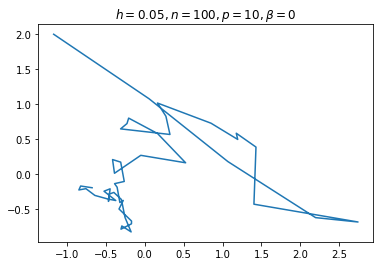

In [39]:
# pca project
vals = np.array(proc.vals)
projector = PCA(n_components=2)
vals_embedded = projector.fit_transform(vals)
# plot
x = []
y = []
# extract x, y
for embed in vals_embedded:
    x.append(embed[0])
    y.append(embed[1])
plt.figure()
plt.title(f"$h = {proc.h}, n = {proc.n}, p = {proc.p}, \\beta = {proc.beta}$")
plt.plot(x, y)